/opt/anaconda3/envs/datascience/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: overflow encountered in exp
/opt/anaconda3/envs/datascience/lib/python3.7/site-packages/ipykernel_launcher.py:32: RuntimeWarning: divide by zero encountered in true_divide
/opt/anaconda3/envs/datascience/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in multiply


Text(0, 0.5, 'cost')

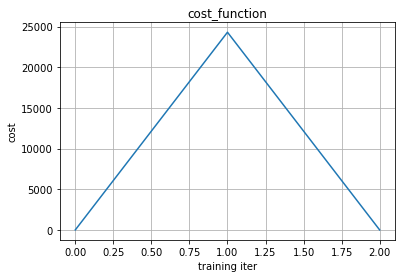

In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

X = np.array([ [0, 1], [1,0], [1, 1], [0, 0] ])
X

y = np.array([ [1], [1], [0], [0] ])
y

n_input = 2
n_hidden = 5
n_output = 1
"""The numpy. random. randn() function creates an array of specified 
hape and fills it with random values as per standard normal distribution."""
Wxh = np.random.randn(n_input, n_output)
bh = np.zeros((1, n_hidden))

Why = np.random.randn(n_hidden, n_output)
by = np.zeros((1, n_output))

def sigmoid(z):
    return  1 / (1+np.exp(-z))

# def sigmoid_derivative(z):
#     return np.exp(-z) / ((1 + np.exp(-z)) ** 2)

def swish(z, beta):
    return 2 * z * sigmoid(beta * z)

def swish_derivative(z, beta):
    return 2 *((1 + (beta * ( z**2 ))) / sigmoid(beta*z))  


def forward(X, Wxh, Why):
    z1 = np.dot(X, Wxh) + bh
    a1 = swish(z1, beta = 1)
    z2 = np.dot(a1, Why) + by
    y_hat = swish(z2, beta = 1)
    return z1, a1, z2, y_hat

def backward(y_hat, z1, a1, z2):
    delta2 = np.multiply(-(y-y_hat), swish_derivative(z2, beta = 1))
    dJ_dWhy = np.dot(a1.T, delta2)
    delta1 = np.dot(delta2, Why.T) * swish_derivative(z1, beta = 1)
    dJ_dWxh = np.dot(X.T, delta1)
    return dJ_dWxh, dJ_dWhy

def cost_f(y, y_hat):
    J = 0.5*sum((y-y_hat)**2)
    return J

alpha = 0.1
num_iter = 5000

cost = []
for i in range(num_iter):
    z1, a1, z2, y_hat = forward(X, Wxh, Why)
    dJ_dWxh, dJ_dWhy = backward(y_hat, z1, a1, z2)
    
    Wxh = Wxh - alpha * dJ_dWxh
    Why = Why - alpha * dJ_dWhy
    c = cost_f(y, y_hat)
    cost.append(c)

plt.grid()
plt.plot(range(num_iter), cost)
plt.title("cost_function")
plt.xlabel("training iter")
plt.ylabel("cost")